# Project Evaluation
This file is used to evaluate my project, by makin an intra-, inter and argumenation analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from model_evaluations_data import *

In [2]:
def evaluate_model(name: str, simple, advanced, summary):
    df_simple = EvaluationResult.to_dataframe(simple)
    df_advanced = EvaluationResult.to_dataframe(advanced)
    summary_vector = np.array(summary.to_list())
    
    return {
        "Model": name,
        "Simple Std Dev": df_simple.std().mean(),
        "Advanced Std Dev": df_advanced.std().mean(),
        "Simple Mean": df_simple.mean().mean(),
        "Advanced Mean": df_advanced.mean().mean(),
        "Summary Diff (from Adv. Mean)": (summary_vector - df_advanced.mean().values).mean()
    }

def evaluate_all(models_dict):
    results = []
    for name, data in models_dict.items():
        result = evaluate_model(name, data["simple"], data["advanced"], data["summary"])
        results.append(result)
    return pd.DataFrame(results)

In [3]:
def plot_model_comparison(df):
    df.set_index("Model")[["Simple Mean", "Advanced Mean"]].plot(kind='bar', figsize=(10, 6))
    plt.title("Mean Evaluation Scores per Model")
    plt.ylabel("Average Score")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_std_devs(df):
    df.set_index("Model")[["Simple Std Dev", "Advanced Std Dev"]].plot(kind='bar', figsize=(10, 6))
    plt.title("Intra-Model Evaluation Consistency")
    plt.ylabel("Standard Deviation")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

def plot_summary_diffs(df):
    df.set_index("Model")[["Summary Diff (from Adv. Mean)"]].plot(kind='bar', figsize=(10, 5), color='orange')
    plt.title("Deviation of Summary from Advanced Evaluation")
    plt.ylabel("Mean Difference")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

         Model  Simple Std Dev  Advanced Std Dev  Simple Mean  Advanced Mean  \
0      mistral         0.57735          0.718234          6.5       6.611111   
1  deepseek-r1         0.57735          0.718234          6.5       6.611111   
2      mixtral         0.57735          0.718234          6.5       6.611111   
3     llama3-1         0.57735          0.718234          6.5       6.611111   
4       gemma3         0.57735          0.718234          6.5       6.611111   
5          phi         0.57735          0.718234          6.5       6.611111   

   Summary Diff (from Adv. Mean)  
0                       0.555556  
1                      -0.444444  
2                       0.722222  
3                       0.555556  
4                      -0.277778  
5                      -0.444444  


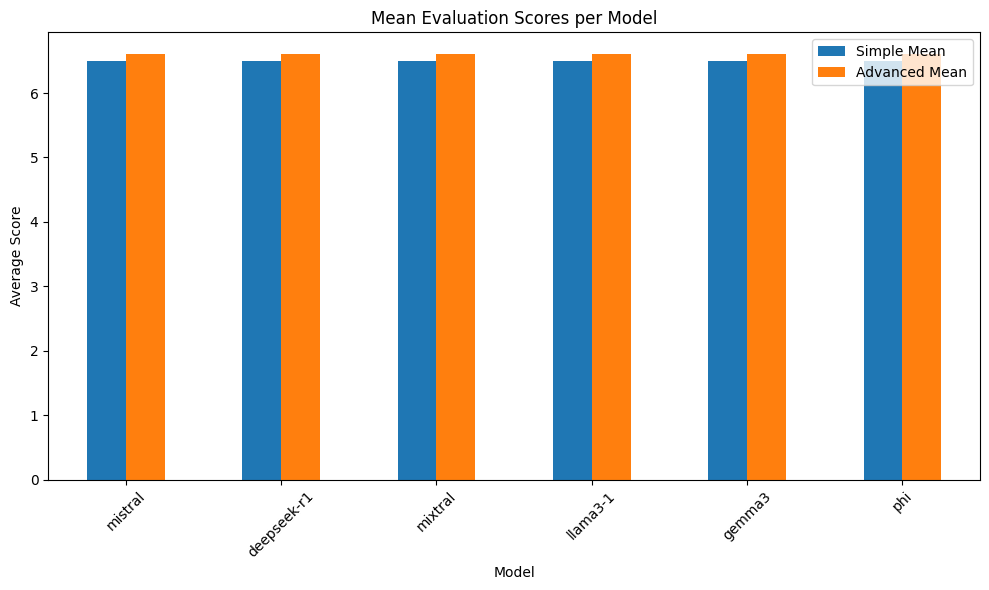

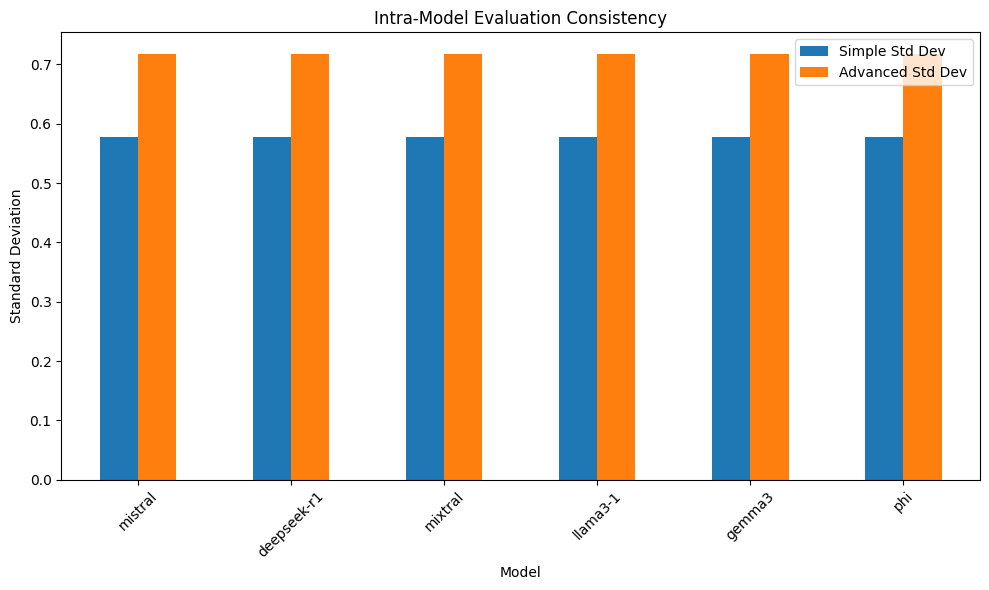

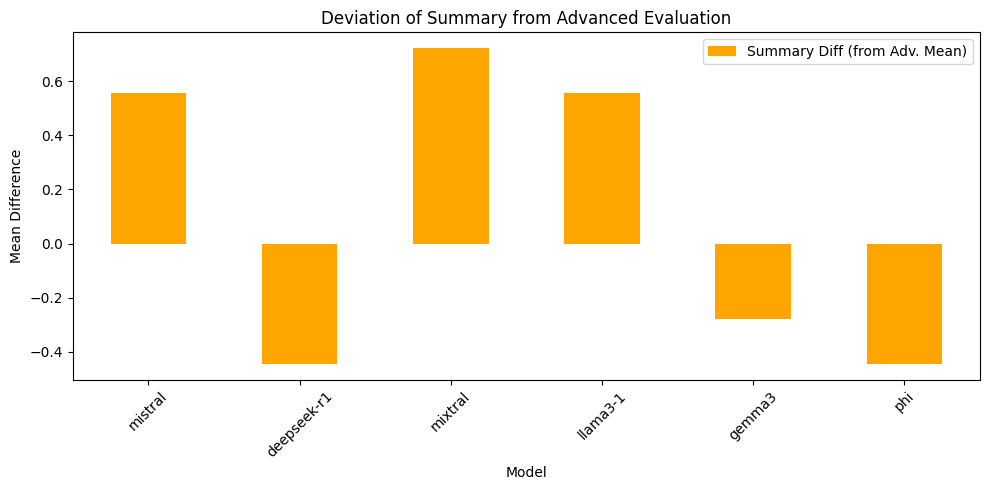

In [4]:
if __name__ == "__main__":
    models = {
        MISTRAL_ID: {
            "simple": MISTRAL_EVALUATIONS,
            "advanced": MISTRAL_ADVANCED_EVALUATIONS,
            "summary": MISTRAL_SUMMARY
        },
        DEEPSEEK_ID: {
            "simple": DEEPSEEK_EVALUATIONS,
            "advanced": DEEPSEEK_ADVANCED_EVALUATIONS,
            "summary": DEEPSEEK_SUMMARY
        },
        MIXTRAL_ID: {
            "simple": MIXTRAL_EVALUATIONS,
            "advanced": MIXTRAL_ADVANCED_EVALUATIONS,
            "summary": MIXTRAL_SUMMARY
        },
        LLAMA3_1_ID: {
            "simple": LLAMA3_1_EVALUATIONS,
            "advanced": LLAMA3_1_ADVANCED_EVALUATIONS,
            "summary": LLAMA3_1_SUMMARY
        },
        GEMMA3_ID: {
            "simple": GEMMA3_EVALUATIONS,
            "advanced": GEMMA3_ADVANCED_EVALUATIONS,
            "summary": GEMMA3_SUMMARY
        },
        PHI_ID: {
            "simple": PHI_EVALUATIONS,
            "advanced": PHI_ADVANCED_EVALUATIONS,
            "summary": PHI_SUMMARY
        }
    }

    results_df = evaluate_all(models)
    print(results_df)

    # Visualizations
    plot_model_comparison(results_df)
    plot_std_devs(results_df)
    plot_summary_diffs(results_df)